In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def reset_graph(seed=None):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


#### Basic RNNs in TensorFlow

In [20]:
reset_graph(42)

n_neurons = 5
n_inputs = 3

X0 = tf.placeholder(shape=(None, n_inputs), dtype=tf.float32, name='X0')
X1 = tf.placeholder(shape=(None, n_inputs), dtype=tf.float32, name='X1')

Wx = tf.Variable(tf.random_normal(shape=(n_inputs, n_neurons), dtype=tf.float32), name='Wx')
Wy = tf.Variable(tf.random_normal(shape=(n_neurons, n_neurons), dtype=tf.float32), name='Wy')
b = tf.Variable(tf.zeros(shape=(1, n_neurons)), dtype=tf.float32, name='b')

Y0 = tf.nn.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.nn.tanh(tf.matmul(X1, Wx) + tf.matmul(Y0, Wy) + b)

init = tf.global_variables_initializer()

In [21]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

In [22]:
with tf.Session() as sess:
    init.run()
    y0_val, y1_val = sess.run([Y0, Y1], feed_dict={X0:X0_batch, X1:X1_batch})

In [23]:
y0_val

array([[-0.06640061,  0.9625767 ,  0.6810579 ,  0.7091854 , -0.89821595],
       [ 0.99777555, -0.7197888 , -0.99657613,  0.96739244, -0.99989706],
       [ 0.99999785, -0.9989881 , -0.99999887,  0.9967763 , -0.9999999 ],
       [ 1.        , -1.        , -1.        , -0.9981892 ,  0.9995087 ]],
      dtype=float32)

In [24]:
y1_val

array([[ 1.        , -1.        , -1.        ,  0.40200272, -0.99999994],
       [-0.12210429,  0.62805295,  0.96718436, -0.9937122 , -0.2583933 ],
       [ 0.99999815, -0.9999994 , -0.99999744, -0.8594331 , -0.99998796],
       [ 0.99928296, -0.9999981 , -0.9999059 ,  0.98579615, -0.9220575 ]],
      dtype=float32)

#### Static Unrolling Through Time

In [16]:
reset_graph(42)

X0 = tf.placeholder(shape=(None, n_inputs), dtype=tf.float32)
X1 = tf.placeholder(shape=(None, n_inputs), dtype=tf.float32)

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, dtype=tf.float32)
outputs, states = tf.contrib.rnn.static_rnn(cell, inputs=[X0, X1], dtype=tf.float32)

Y0, Y1 = outputs

init = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
    init.run()
    
    y0_val, y1_val = sess.run([Y0, Y1], feed_dict={X0:X0_batch, X1:X1_batch})

In [18]:
y0_val

array([[ 0.30741337, -0.32884312, -0.6542847 , -0.9385059 ,  0.52089024],
       [ 0.9912275 , -0.95425415, -0.7518078 , -0.9995208 ,  0.98202336],
       [ 0.99992675, -0.99783254, -0.82473516, -0.99999636,  0.99947786],
       [ 0.9967709 , -0.6875061 ,  0.8419969 ,  0.93039113,  0.81206834]],
      dtype=float32)

In [19]:
y1_val

array([[ 0.99998885, -0.9997606 , -0.06679297, -0.9999803 ,  0.99982214],
       [-0.65249425, -0.5152086 , -0.37968948, -0.5922594 , -0.08968376],
       [ 0.998624  , -0.99715203, -0.03308632, -0.9991566 ,  0.9932902 ],
       [ 0.99681675, -0.9598194 ,  0.39660627, -0.8307605 ,  0.7967197 ]],
      dtype=float32)

#### Packing sequences


In [41]:
n_steps = 2

reset_graph(42)

X = tf.placeholder(shape=(None, n_steps, n_inputs), dtype=tf.float32)
X_seq = tf.unstack(X, axis=1)

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, dtype=tf.float32)
outputs, states = tf.contrib.rnn.static_rnn(cell, X_seq, dtype=tf.float32)
Y = tf.stack(outputs, axis=1)   # [n_steps, n_batch, n_outputs] to [n_batch, n_steps, n_outputs]

init = tf.global_variables_initializer()

In [42]:
X_batch = np.stack([X0_batch, X1_batch], axis=1)
X_batch.shape

(4, 2, 3)

In [43]:
with tf.Session() as sess:
    init.run()
    y_vals = sess.run(Y, feed_dict={X:X_batch})

In [44]:
y_vals[:, 0, :]

array([[ 0.30741337, -0.32884312, -0.6542847 , -0.9385059 ,  0.52089024],
       [ 0.9912275 , -0.95425415, -0.7518078 , -0.9995208 ,  0.98202336],
       [ 0.99992675, -0.99783254, -0.82473516, -0.99999636,  0.99947786],
       [ 0.9967709 , -0.6875061 ,  0.8419969 ,  0.93039113,  0.81206834]],
      dtype=float32)

In [45]:
y_vals[:, 1, :]

array([[ 0.99998885, -0.9997606 , -0.06679297, -0.9999803 ,  0.99982214],
       [-0.65249425, -0.5152086 , -0.37968948, -0.5922594 , -0.08968376],
       [ 0.998624  , -0.99715203, -0.03308632, -0.9991566 ,  0.9932902 ],
       [ 0.99681675, -0.9598194 ,  0.39660627, -0.8307605 ,  0.7967197 ]],
      dtype=float32)

#### Dynamic Unrolling Through Time

In [49]:
reset_graph(42)

X = tf.placeholder(shape=(None, n_steps, n_inputs), dtype=tf.float32)

cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, dtype=tf.float32)

outputs, final_state = tf.nn.dynamic_rnn(cell, X, swap_memory=True, dtype=tf.float32)

init = tf.global_variables_initializer()

In [50]:
with tf.Session() as sess:
    init.run()
    y_vals = sess.run(outputs, feed_dict={X:X_batch})

In [51]:
y_vals[:, 0, :]

array([[ 0.0378538 , -0.15408303,  0.14973706, -0.24456905,  0.07668073],
       [ 0.4606834 , -0.25947353,  0.30695435, -0.2868817 ,  0.2049561 ],
       [ 0.60006094, -0.28905845,  0.32757068, -0.23607855,  0.17045966],
       [ 0.01933202, -0.10265654, -0.11868899, -0.11182512,  0.22340931]],
      dtype=float32)

In [52]:
y_vals[:, 1, :]

array([[ 0.5078472 , -0.34868512,  0.5885308 , -0.10525279,  0.30745143],
       [ 0.223334  , -0.1586807 ,  0.30704316, -0.17202646,  0.08301067],
       [ 0.56495124, -0.29496425,  0.5830251 , -0.1567294 ,  0.4077634 ],
       [ 0.18188317, -0.30679742,  0.31245103, -0.2597941 ,  0.32252073]],
      dtype=float32)

#### Handling Variable Length Input Sequences

In [56]:
reset_graph(42)

X = tf.placeholder(shape=(None, n_steps, n_inputs), dtype=tf.float32)
seq_length = tf.placeholder(shape=(None), dtype=tf.int32)

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, dtype=tf.float32)
outputs, final_state = tf.nn.dynamic_rnn(cell, X, sequence_length=seq_length, dtype=tf.float32)

init = tf.global_variables_initializer()

In [57]:
with tf.Session() as sess:
    init.run()
    outputs_vals, state_val = sess.run([outputs, final_state], 
                                       feed_dict={X:X_batch, seq_length:[2,1,2,2]})

In [58]:
outputs_vals

array([[[ 0.8988519 ,  0.8505537 ,  0.56778944, -0.8374146 ,
         -0.2971686 ],
        [ 0.33833316,  0.99999976,  0.9999228 , -0.8159838 ,
         -0.9884343 ]],

       [[ 0.9687243 ,  0.9997934 ,  0.9865295 , -0.9741773 ,
         -0.74235857],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]],

       [[ 0.99056906,  0.99999976,  0.99966645, -0.99614036,
         -0.92241997],
        [ 0.03740446,  0.99979746,  0.9984369 ,  0.17223895,
         -0.9581747 ]],

       [[-0.99994797,  0.9370876 ,  0.9552369 ,  0.9998339 ,
         -0.9967721 ],
        [ 0.06362297,  0.9876108 ,  0.98544383,  0.29195598,
          0.7661819 ]]], dtype=float32)

In [59]:
state_val

array([[ 0.33833316,  0.99999976,  0.9999228 , -0.8159838 , -0.9884343 ],
       [ 0.9687243 ,  0.9997934 ,  0.9865295 , -0.9741773 , -0.74235857],
       [ 0.03740446,  0.99979746,  0.9984369 ,  0.17223895, -0.9581747 ],
       [ 0.06362297,  0.9876108 ,  0.98544383,  0.29195598,  0.7661819 ]],
      dtype=float32)

#### Training a Sequence Classifier

In [60]:
from keras.datasets.mnist import load_data


(X_train, y_train), (X_test, y_test) = load_data()

In [66]:
X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [67]:
def random_batch(X, y, batch_size):
    assert len(X) == len(y)
    rand_idx = np.random.permutation(len(X))
    for idx in np.array_split(rand_idx, batch_size):
        yield X[idx], y[idx]

In [68]:
# each row => one step of 28-input vector
n_steps = 28      # num_rows
n_inputs = 28     # num_cols
n_outputs = 10    # 10 digits
n_neurons = 150   # rnn state

learning_rate = .001

reset_graph(42)

X = tf.placeholder(shape=(None, n_steps, n_inputs), dtype=tf.float32, name='X')
y = tf.placeholder(shape=(None), dtype=tf.int32, name='y')

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, dtype=tf.float32)

outputs, states = tf.nn.dynamic_rnn(cell, X, swap_memory=True, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs, activation=None, name='logits')
y_proba = tf.nn.softmax(logits, axis=1, name='y_proba')

with tf.name_scope('train'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy, name='loss')
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_op = optimizer.minimize(loss)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, k=1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='accuracy')
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [69]:
n_epoch = 100
batch_size = 150


with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epoch):
        for X_batch, y_batch in random_batch(X_train, y_train, batch_size):
            sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
        tr_acc = sess.run(accuracy, feed_dict={X:X_batch, y:y_batch})
        val_acc = sess.run(accuracy, feed_dict={X:X_test, y:y_test})
        print("Epoch {:3d}, tr-acc: {:.4f}, val-acc: {:.4f}".format(epoch, tr_acc, val_acc))
        

Epoch   0, tr-acc: 0.9150, val-acc: 0.9155
Epoch   1, tr-acc: 0.9400, val-acc: 0.9365
Epoch   2, tr-acc: 0.9550, val-acc: 0.9478
Epoch   3, tr-acc: 0.9575, val-acc: 0.9556
Epoch   4, tr-acc: 0.9700, val-acc: 0.9578
Epoch   5, tr-acc: 0.9725, val-acc: 0.9633
Epoch   6, tr-acc: 0.9700, val-acc: 0.9618
Epoch   7, tr-acc: 0.9650, val-acc: 0.9688
Epoch   8, tr-acc: 0.9750, val-acc: 0.9693
Epoch   9, tr-acc: 0.9850, val-acc: 0.9694
Epoch  10, tr-acc: 0.9825, val-acc: 0.9673
Epoch  11, tr-acc: 0.9775, val-acc: 0.9687
Epoch  12, tr-acc: 0.9925, val-acc: 0.9701
Epoch  13, tr-acc: 0.9725, val-acc: 0.9726
Epoch  14, tr-acc: 0.9875, val-acc: 0.9737
Epoch  15, tr-acc: 0.9775, val-acc: 0.9734
Epoch  16, tr-acc: 0.9850, val-acc: 0.9750
Epoch  17, tr-acc: 0.9750, val-acc: 0.9728
Epoch  18, tr-acc: 0.9875, val-acc: 0.9745
Epoch  19, tr-acc: 0.9850, val-acc: 0.9760
Epoch  20, tr-acc: 0.9850, val-acc: 0.9751
Epoch  21, tr-acc: 0.9825, val-acc: 0.9769
Epoch  22, tr-acc: 0.9875, val-acc: 0.9733
Epoch  23, 

#### Multi-layer RNNs

In [73]:
n_neurons = 100
n_layers = 3


reset_graph(42)

X = tf.placeholder(shape=(None, n_steps, n_inputs), dtype=tf.float32)
y = tf.placeholder(shape=(None), dtype=tf.int32)

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons) 
               for _ in range(n_layers)]

multi_rnn = tf.contrib.rnn.MultiRNNCell(cells)

outputs, states = tf.nn.dynamic_rnn(multi_rnn, X, dtype=tf.float32)

state_concat = tf.concat(states, axis=1)
logits = tf.layers.dense(state_concat, n_outputs, activation=None)
y_proba = tf.nn.softmax(logits, axis=1)

with tf.name_scope('train'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_op = optimizer.minimize(loss)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, k=1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='accuracy')
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [75]:
n_epoch = 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epoch):
        for X_batch, y_batch in random_batch(X_train, y_train, batch_size):
            sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
        tr_acc = sess.run(accuracy, feed_dict={X:X_batch, y:y_batch})
        val_acc = sess.run(accuracy, feed_dict={X:X_test, y:y_test})
        print('Epoch {:2d}, tr-acc: {:.4f}, val-acc: {:.4f}'.format(epoch, tr_acc, val_acc))

Epoch  0, tr-acc: 0.8700, val-acc: 0.8762
Epoch  1, tr-acc: 0.9292, val-acc: 0.9291
Epoch  2, tr-acc: 0.9483, val-acc: 0.9488
Epoch  3, tr-acc: 0.9600, val-acc: 0.9564
Epoch  4, tr-acc: 0.9575, val-acc: 0.9595
Epoch  5, tr-acc: 0.9692, val-acc: 0.9670
Epoch  6, tr-acc: 0.9750, val-acc: 0.9674
Epoch  7, tr-acc: 0.9717, val-acc: 0.9699
Epoch  8, tr-acc: 0.9717, val-acc: 0.9716
Epoch  9, tr-acc: 0.9825, val-acc: 0.9687


#### Training to Predict Time Series

In [12]:
tmin, tmax = 0, 30
resolution = .1

def time_series(T):
    return T*np.sin(T)/3. + 2*np.sin(5*T)

def make_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (tmax - tmin - n_steps*resolution)
    T = t0 + np.arange(0., n_steps+1) * resolution
    y = time_series(T)
    return y[:, :-1][:,:,None], y[:, 1:][:, :, None]

Text(0.5,1,'$f(t) = \\frac{t}{3}\\dot\\sin{t} + 2\\dot\\sin{5t}$')

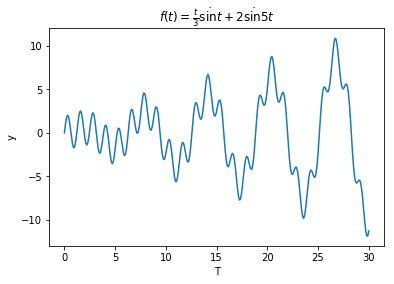

In [4]:
ts = np.linspace(tmin, tmax, num=int((tmax-tmin)/resolution))

plt.plot(ts, time_series(ts))
plt.xlabel('T')
plt.ylabel('y')
plt.title(r'$f(t) = \frac{t}{3}\dot\sin{t} + 2\dot\sin{5t}$')

In [22]:
x_batch, y_batch = make_batch(1, n_steps=20)

In [23]:
x_batch.shape, y_batch.shape

((1, 20, 1), (1, 20, 1))

In [24]:
np.c_[x_batch, y_batch]

array([[[ 4.66796425,  4.54529223],
        [ 4.54529223,  3.92249817],
        [ 3.92249817,  2.79365036],
        [ 2.79365036,  1.27067285],
        [ 1.27067285, -0.442449  ],
        [-0.442449  , -2.09794316],
        [-2.09794316, -3.46320282],
        [-3.46320282, -4.37599908],
        [-4.37599908, -4.78245411],
        [-4.78245411, -4.74849512],
        [-4.74849512, -4.44200275],
        [-4.44200275, -4.09004216],
        [-4.09004216, -3.92166556],
        [-3.92166556, -4.1103069 ],
        [-4.1103069 , -4.72988882],
        [-4.72988882, -5.73540378],
        [-5.73540378, -6.97273807],
        [-6.97273807, -8.21534686],
        [-8.21534686, -9.2188127 ],
        [-9.2188127 , -9.77994034]]])

#### Using an OutputProjectionWrapper¶


In [32]:
reset_graph()

n_inputs = 1
n_outputs = 1
n_neurons = 100
n_steps = 20
learning_rate = .001

X = tf.placeholder(shape=(None, n_steps, n_inputs), dtype=tf.float32)
y = tf.placeholder(shape=(None, n_steps, n_outputs), dtype=tf.float32)

cell = tf.contrib.rnn.BasicRNNCell(n_neurons, activation=tf.nn.relu)
cell_with_output = tf.contrib.rnn.OutputProjectionWrapper(cell, 
                                                          output_size=n_outputs, activation=None)

outputs, states = tf.nn.dynamic_rnn(cell_with_output, X, dtype=tf.float32)

In [33]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

In [34]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [44]:
n_iterations = 2000
batch_size = 50

with tf.Session() as sess:
    init.run()
    for i in range(n_iterations):
        X_batch, y_batch = make_batch(batch_size, n_steps)
        sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
        if i%100==0:
            print("Iterations {:5d}, loss: {:.4f}".format(i, 
                                                          sess.run(loss, feed_dict={X:X_batch, y:y_batch})))
            
    save_path = saver.save(sess, './my_time_series_model')

Iterations     0, loss: 13.5429
Iterations   100, loss: 0.4432
Iterations   200, loss: 0.2258
Iterations   300, loss: 0.0717
Iterations   400, loss: 0.0592
Iterations   500, loss: 0.0469
Iterations   600, loss: 0.0517
Iterations   700, loss: 0.0503
Iterations   800, loss: 0.0553
Iterations   900, loss: 0.0489
Iterations  1000, loss: 0.0373
Iterations  1100, loss: 0.0458
Iterations  1200, loss: 0.0524
Iterations  1300, loss: 0.0414
Iterations  1400, loss: 0.0461
Iterations  1500, loss: 0.0447
Iterations  1600, loss: 0.0375
Iterations  1700, loss: 0.0343
Iterations  1800, loss: 0.0439
Iterations  1900, loss: 0.0447


In [35]:
t_instances = np.linspace(12.2, 12.2 + n_steps*resolution, n_steps+1)

In [38]:
X_new = time_series(t_instances[:-1]).reshape((1, n_steps, 1))
y_new = time_series(t_instances[1:]).reshape((1, n_steps, 1))

In [39]:
X_new.shape, y_new.shape

((1, 20, 1), (1, 20, 1))

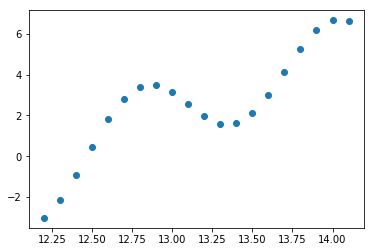

In [43]:
plt.plot(t_instances[:-1], y_new.flat, 'o')

In [45]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    
    y_pred = sess.run(outputs, feed_dict={X:X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


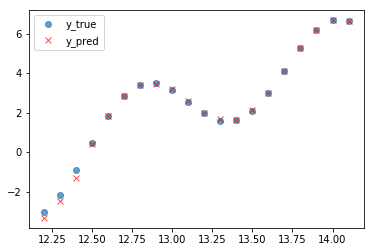

In [49]:
plt.plot(t_instances[:-1], y_new.flat, 'o', alpha=.7, label='y_true')
plt.plot(t_instances[:-1], y_pred.flat, 'rx', alpha=.7, label='y_pred')
plt.legend()

#### Without using an OutputProjectionWrapper¶


In [61]:
reset_graph()

X = tf.placeholder(shape=(None, n_steps, n_inputs), dtype=tf.float32)
y = tf.placeholder(shape=(None, n_steps, n_outputs), dtype=tf.float32)

cell = tf.contrib.rnn.BasicRNNCell(n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# [batch, steps, neurons] -> [batch*steps, neurons]
outputs_stack = tf.reshape(rnn_outputs, shape=(-1, n_neurons))
seq_outputs = tf.layers.dense(outputs_stack, units=n_outputs, activation=None)
outputs = tf.reshape(seq_outputs, shape=(-1, n_steps, n_outputs))

In [62]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [63]:
n_iterations = 1500
batch_size = 50


with tf.Session() as sess:
    init.run()
    for i in range(n_iterations):
        X_batch, y_batch = make_batch(batch_size, n_steps)
        sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
        
        if i%100==0:
            mse = sess.run(loss, feed_dict={X:X_batch, y:y_batch})
            print('Iters: {:4d}, loss: {:.4f}'.format(i, mse))
    save_path = saver.save(sess, save_path)

Iters:    0, loss: 13.2406
Iters:  100, loss: 0.4346
Iters:  200, loss: 0.1772
Iters:  300, loss: 0.0780
Iters:  400, loss: 0.0645
Iters:  500, loss: 0.0641
Iters:  600, loss: 0.0465
Iters:  700, loss: 0.0471
Iters:  800, loss: 0.0576
Iters:  900, loss: 0.0546
Iters: 1000, loss: 0.0516
Iters: 1100, loss: 0.0567
Iters: 1200, loss: 0.0409
Iters: 1300, loss: 0.0454
Iters: 1400, loss: 0.0417


In [54]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    y_pred = sess.run(outputs, feed_dict={X:X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


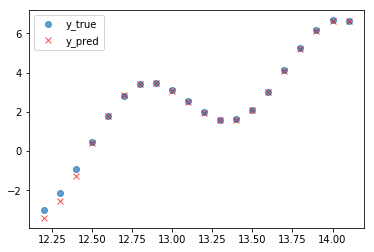

In [56]:
plt.plot(t_instances[:-1], y_new.flat, 'o', alpha=.7, label='y_true')
plt.plot(t_instances[:-1], y_pred.flat, 'rx', alpha=.7, label='y_pred')
plt.legend()

#### Creative RNN

In [64]:
n_creative = 300

with tf.Session() as sess:
    saver.restore(sess, save_path)
    
    sequence = [0.] * n_steps
    for i in range(n_creative):
        y_pred = sess.run(outputs, feed_dict={X:np.array(sequence[-n_steps:]).reshape((1, n_steps, 1))})
        sequence.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


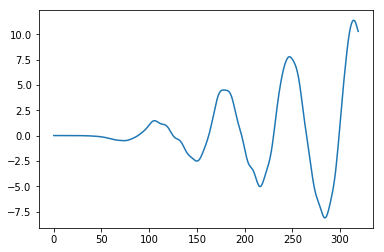

In [65]:
plt.plot(range(len(sequence)), sequence)

In [77]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    
    seq1 = [0. for i in range(n_steps)]
    for i in range(len(ts) - n_steps):
        X_in = np.array(seq1[-n_steps:]).reshape((1, n_steps, 1))
        y_pred = sess.run(outputs, feed_dict={X:X_in})
        seq1.append(y_pred[0, -1, 0])
        
    seq2 = list(time_series(ts[-n_steps:]))
    for i in range(len(ts) - n_steps):
        X_in = np.array(seq2[-n_steps:]).reshape((1, n_steps, 1))
        y_pred = sess.run(outputs, feed_dict={X:X_in})
        seq2.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


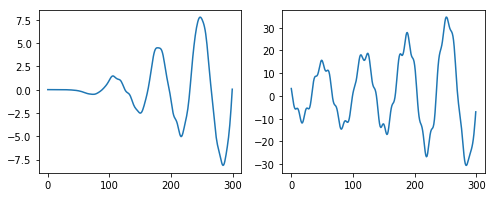

In [78]:
plt.figure(figsize=(8, 3))

plt.subplot('121')
plt.plot(range(len(seq1)), seq1)

plt.subplot('122')
plt.plot(range(len(seq2)), seq2)

#### Deep RNNs

In [83]:
n_inputs = 2
n_steps = 5
n_neurons = 100
n_layers = 3

reset_graph()

X = tf.placeholder(shape=(None, n_steps, n_inputs), dtype=tf.float32)

multi_cells = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicRNNCell(n_neurons, activation=tf.nn.relu) 
                                           for _ in range(n_layers)])
outputs, states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)

init = tf.global_variables_initializer()

In [84]:
X_batch = np.random.rand(2, n_steps, n_inputs)

with tf.Session() as sess:
    init.run()
    output_val = sess.run(outputs, feed_dict={X:X_batch})

In [86]:
output_val.shape

(2, 5, 100)

In [87]:
cell.state_size

100

In [88]:
cell.output_size

100

#### Applying Dropout

In [7]:
reset_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1
learning_rate = .001


In [8]:
reset_graph()

X = tf.placeholder(shape=(None, n_steps, n_inputs), dtype=tf.float32)
y = tf.placeholder(shape=(None, n_steps, n_outputs), dtype=tf.float32)
keep_prob = tf.placeholder_with_default(1.0, shape=())

cell_dropout = [tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.BasicRNNCell(n_neurons, activation=tf.nn.relu),
                                              input_keep_prob=keep_prob) for _ in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(cell_dropout)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)

stack_outputs = tf.reshape(rnn_outputs, shape=(-1, n_neurons))
fc_outputs = tf.layers.dense(stack_outputs, n_outputs, activation=None)
outputs = tf.reshape(fc_outputs, shape=(-1, n_steps, n_outputs))

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

In [9]:
outputs

<tf.Tensor 'Reshape_1:0' shape=(?, 20, 1) dtype=float32>

In [10]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [13]:
n_iterations = 2500
batch_size = 50
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    
    for i in range(n_iterations):
        X_batch, y_batch = make_batch(batch_size, n_steps)
        _, mse = sess.run([train_op, loss], feed_dict={X:X_batch, y:y_batch, keep_prob:train_keep_prob})
        
        if i%100==0:
            print('Iters {:4d}, tr-mse: {:.4f}'.format(i, mse))

Iters    0, tr-mse: 18.2429
Iters  100, tr-mse: 3.9383
Iters  200, tr-mse: 3.7847
Iters  300, tr-mse: 3.4578
Iters  400, tr-mse: 2.8723
Iters  500, tr-mse: 3.9046
Iters  600, tr-mse: 2.6530
Iters  700, tr-mse: 2.7772
Iters  800, tr-mse: 2.2792
Iters  900, tr-mse: 1.8333
Iters 1000, tr-mse: 3.0705
Iters 1100, tr-mse: 1.8909
Iters 1200, tr-mse: 2.0965
Iters 1300, tr-mse: 2.0983
Iters 1400, tr-mse: 2.4465
Iters 1500, tr-mse: 1.7502
Iters 1600, tr-mse: 2.8463
Iters 1700, tr-mse: 2.2980
Iters 1800, tr-mse: 1.8840
Iters 1900, tr-mse: 1.9401
Iters 2000, tr-mse: 2.2816
Iters 2100, tr-mse: 2.6805
Iters 2200, tr-mse: 1.6527
Iters 2300, tr-mse: 1.9259
Iters 2400, tr-mse: 1.5915


#### LSTM Cell

In [20]:
from keras.datasets.mnist import load_data

In [21]:
(X_train, y_train), (X_test, y_test) = load_data()

In [24]:
X_train = X_train.astype(np.float16) / 255.
X_test = X_test.astype(np.float16) / 255.
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [26]:
def mnist_batch(X, y, batch_size):
    assert len(X) == len(y)
    rnd_idx = np.random.permutation(len(X))
    for idx in np.array_split(rnd_idx, batch_size):
        yield X[idx], y[idx]

In [19]:
reset_graph()

# mnist dataset
n_inputs = 28  # image columns
n_steps = 28   # image rows
n_layers = 3
n_neurons = 150
n_outputs = 10    # 0-9 digits

learning_rate = .001


X = tf.placeholder(shape=(None, n_steps, n_inputs), dtype=tf.float16)
y = tf.placeholder(shape=(None,), dtype=tf.int32)

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(n_neurons) for layer in range(n_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float16)

last_hidden_states = states[-1][1]
logits = tf.layers.dense(last_hidden_states, n_outputs, activation=None)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(predictions=logits, targets=y, k=1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float16))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [15]:
outputs

<tf.Tensor 'rnn/transpose_1:0' shape=(?, 28, 100) dtype=float32>

In [16]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 100) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 100) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 100) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 100) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 100) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 100) dtype=float32>))

In [17]:
states[-1]

LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 100) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 100) dtype=float32>)

In [18]:
states[-1][1]

<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 100) dtype=float32>

In [28]:
n_epochs= 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in mnist_batch(X_train, y_train, batch_size):
            sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
            
        tr_acc = sess.run(accuracy, feed_dict={X:X_batch, y:y_batch})
        val_acc = np.mean([sess.run(accuracy, feed_dict={X:X_batch_test, y:y_batch_test})
                            for X_batch_test, y_batch_test in mnist_batch(X_test, y_test, batch_size)])
        print("Epoch {:2d}, tr-acc: {:.4f}, val-acc: {:.4f}".format(epoch, tr_acc, val_acc))

Epoch  0, tr-acc: 0.7817, val-acc: 0.7717
Epoch  1, tr-acc: 0.9108, val-acc: 0.9016
Epoch  2, tr-acc: 0.9400, val-acc: 0.9292
Epoch  3, tr-acc: 0.9633, val-acc: 0.9460
Epoch  4, tr-acc: 0.9575, val-acc: 0.9552
Epoch  5, tr-acc: 0.9625, val-acc: 0.9620
Epoch  6, tr-acc: 0.9742, val-acc: 0.9672
Epoch  7, tr-acc: 0.9742, val-acc: 0.9656
Epoch  8, tr-acc: 0.9783, val-acc: 0.9730
Epoch  9, tr-acc: 0.9817, val-acc: 0.9718


#### Word Embeddings

##### fetch data

In [3]:
from six.moves import urllib
import os
import zipfile

##### step 1: download data

In [4]:
WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

In [12]:
def fetch_data(url=WORDS_URL, path=WORDS_PATH):
    os.makedirs(path, exist_ok=True)
    zip_file = os.path.join(path, 'words.zip')
    if not os.path.exists(zip_file):
        urllib.request.urlretrieve(url, zip_file)
    with zipfile.ZipFile(zip_file) as zf:
        data = zf.read(zf.namelist()[0])
    return data.decode('utf-8').split()

In [13]:
words = fetch_data()

In [14]:
len(words)

17005207

##### step 2: build dictionary and replace rare words with UNK token

In [15]:
from collections import Counter

In [16]:
vocab_size = 50000

wc = Counter(words)

In [17]:
# rank words by its frequency
vocabs = [('UNK', None)] + wc.most_common(n=vocab_size-1)

In [19]:
word2idx = {word:i for i, (word, _) in enumerate(vocabs)}

In [47]:
idx2word = dict(zip(word2idx.values(), word2idx.keys()))

In [20]:
data = np.array([word2idx.get(w, 0) for w in words])

In [24]:
" ".join(words[:10]), data[:10]

('anarchism originated as a term of abuse first used against',
 array([5242, 3081,   12,    6,  195,    2, 3136,   46,   59,  156]))

In [23]:
data[24], words[24]

(0, 'culottes')

##### step 3: create a function to generate a training batch for the skip-model

In [62]:
from collections import deque
from random import sample

def generate_batch(batch_size, num_skips, skip_windows):
    global data_index
    assert batch_size%num_skips == 0
    assert num_skips <= 2*skip_windows
    span = 2*skip_windows + 1
    batch = np.empty(shape=(batch_size), dtype=np.int32)
    labels = np.empty(shape=(batch_size, 1), dtype=np.int32)
    buffer = deque(maxlen=span)
    
    # load data into deque
    buffer.extend(data[data_index:data_index+span])
    data_index = (data_index+span) % len(data)
    
    for i in range(batch_size//num_skips):
        input_idx = skip_windows
        context_idx = [c for c in range(span) if c!= input_idx]
        for j, target_idx in enumerate(sample(context_idx, num_skips)):
            batch[i*num_skips+j] = buffer[input_idx]
            labels[i*num_skips+j] = buffer[target_idx]
        # update queue
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    
    
    return batch, labels

In [75]:
data_index = 0

In [76]:
batch, labels = generate_batch(batch_size=8, num_skips=2, skip_windows=1)

In [77]:
for target, context in zip(batch, labels.flat):
    print("{} -> {}".format(idx2word[target], idx2word[context]))

originated -> as
originated -> anarchism
as -> originated
as -> a
a -> as
a -> term
term -> a
term -> of


In [73]:
words[:10]

['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against']

##### step 4: build a skip-model

In [88]:
batch_size = 128
embed_size = 128
window_skip = 1   # how many words to consider left and right
num_skip = 2      # how many times to reuse a target word
sample_size = 64   # number of negative samples

learning_rate = .01

In [83]:
# a random validation set
valid_size = 16
valid_window = 100
valid_dataset = np.random.choice(valid_window, valid_size, replace=False)

In [84]:
valid_dataset

array([15,  4, 16, 47, 32,  9, 90, 82, 57, 70, 61, 94, 52, 11, 58, 62])

In [93]:
reset_graph()

train_inputs = tf.placeholder(shape=(None), dtype=tf.int32)
train_labels = tf.placeholder(shape=(None, 1), dtype=tf.int32)
valid_inputs = tf.constant(valid_dataset, dtype=tf.int32)

embed_init = tf.random_uniform(shape=(vocab_size, embed_size), minval=-1., maxval=1.)
embedding = tf.Variable(embed_init)

embed = tf.nn.embedding_lookup(embedding, train_inputs)

# noise-contrastive estimation loss
nce_weights = tf.Variable(tf.truncated_normal(shape=(vocab_size, embed_size), 
                                              stddev=1./np.sqrt(embed_size)))
nce_biases = tf.Variable(tf.zeros(shape=(vocab_size)))

loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weights, biases=nce_biases, 
                                     labels=train_labels, inputs=embed, 
                                     num_sampled=sample_size, 
                                     num_classes=vocab_size))

optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embedding), axis=1, keepdims=True))
normalized_embedding = embedding / norm
val_embedding = tf.nn.embedding_lookup(normalized_embedding, valid_inputs)
similarity = tf.matmul(val_embedding, normalized_embedding, transpose_b=True)

init = tf.global_variables_initializer()

In [96]:
n_iterations = 10001


avg_loss = 0.0
with tf.Session() as sess:
    init.run()
    for i in range(n_iterations):
        batch, labels = generate_batch(batch_size, num_skip, window_skip)
        feed_dict = {train_inputs:batch, train_labels:labels}
        _, batch_loss = sess.run([train_op, loss], feed_dict=feed_dict)
        avg_loss += batch_loss
        if (i%2000)==0 and i!=0:
            print("Iterations {:5d}, avg-loss: {:.4f}".format(i, avg_loss/2000))
            avg_loss = 0.0
            
            
        if (i%10000) == 0:
            k = 8
            sim = similarity.eval()
            print("#"*100)
            for idx, neighbor in zip(valid_dataset, np.argsort(sim, axis=1)[:, -k-1:-1]):
                sim_str = "{} : {}".format(idx2word[idx], [idx2word[idx2] for idx2 in neighbor])
                print(sim_str)
            print('#'*100)
            
    final_embedding = normalized_embedding.eval()

####################################################################################################
s : ['keystroke', 'jem', 'bongo', 'loanwords', 'windmills', 'exams', 'parenthesis', 'heaviest']
one : ['squaw', 'boxer', 'ethiopians', 'cutters', 'sustained', 'basalt', 'references', 'progenitor']
five : ['fuss', 'osce', 'lawmaking', 'stuffing', 'drip', 'bains', 'saxons', 'twist']
they : ['inwardly', 'taxpayers', 'peachtree', 'drinking', 'slit', 'luce', 'bunsen', 'phages']
be : ['placenta', 'experimentation', 'ramsey', 'announcements', 'edom', 'lightfoot', 'spark', 'nav']
nine : ['osz', 'meso', 'featuring', 'rightist', 'innovative', 'frying', 'celibate', 'reserved']
use : ['disoriented', 'kazantzakis', 'shams', 'tilting', 'fierce', 'fisherman', 'jubal', 'clearly']
states : ['receiver', 'beaverbrook', 'articulate', 'mosquitoes', 'magdalena', 'putty', 'sosa', 'gun']
who : ['christiane', 'dillon', 'millennial', 'skookum', 'pineapple', 'detonator', 'gy', 'jalalabad']
than : ['skeletons', 'd

In [98]:
np.save('./my_final_embeddings.npy', final_embedding)

##### Plot embeddings

In [99]:
from sklearn.manifold import TSNE

In [107]:
tsne = TSNE(n_components=2, init='pca', n_iter=5000)

n_to_plot = 500

embedding_2d = tsne.fit_transform(final_embedding[:n_to_plot, :])

In [108]:
embedding_2d.shape

(500, 2)

In [102]:
labels = [idx2word[i] for i in range(n_to_plot)]

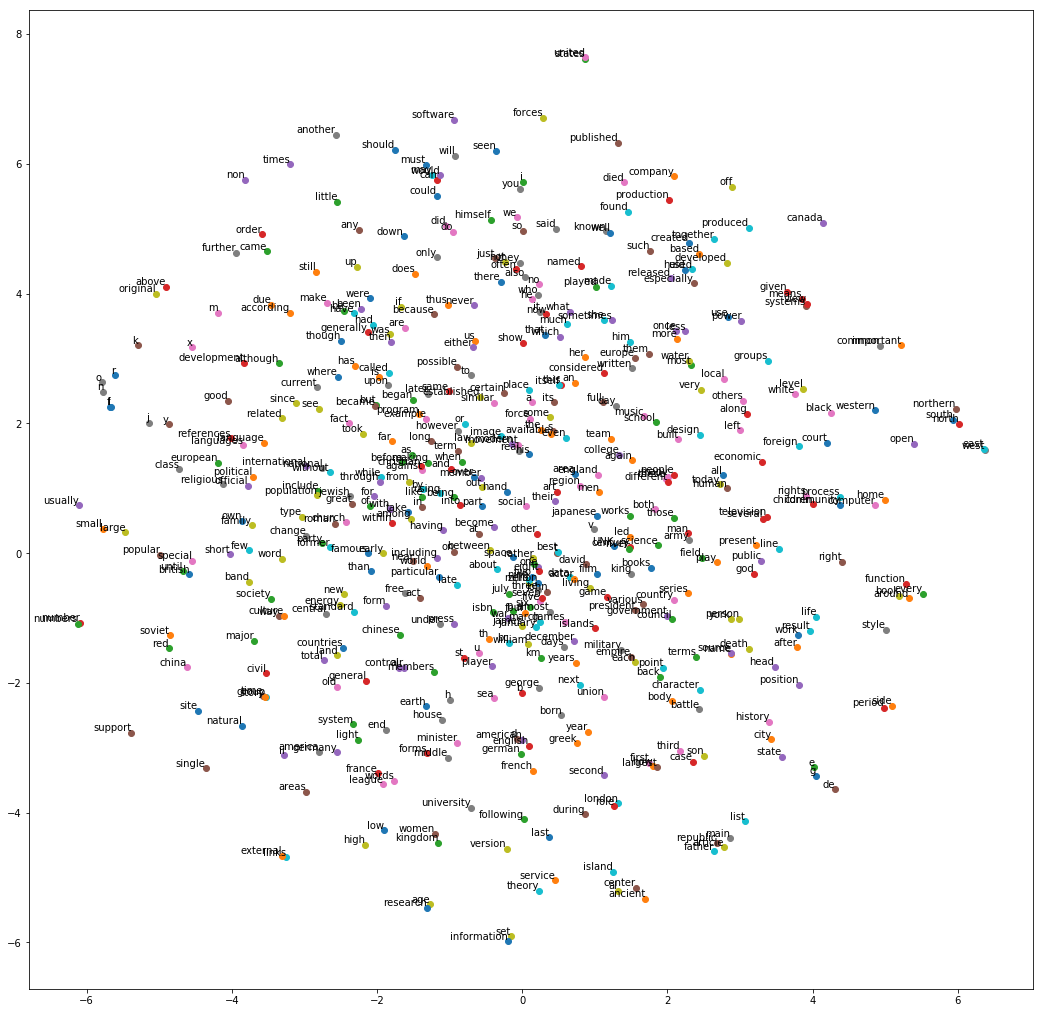

In [109]:
fig = plt.figure(figsize=(18, 18))

for (x, y), label in zip(embedding_2d, labels):
    plt.scatter(x, y)
    plt.annotate(s=label,
                 xy=(x, y),
                 va='bottom', 
                 ha='right')

#### Machine Translation

In [144]:
reset_graph()

n_steps = 50
n_neurons = 200
n_layers = 3
num_encoder_symbols = 20000
num_decoder_symbols = 20000
embedding_size = 150
learning_rate = .01

X = tf.placeholder(shape=(None, n_steps), dtype=tf.int32)    # english sentences
Y = tf.placeholder(shape=(None, n_steps), dtype=tf.int32)    # frence sentences
W = tf.placeholder(shape=(None, n_steps-1, 1), dtype=tf.float32)   # target weights vector
Y_inputs = Y[:, :-1]
Y_outputs = Y[:, 1:]

encoder_inputs = tf.unstack(X, axis=1)
decoder_inputs = tf.unstack(Y, axis=1)

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons) for _ in range(n_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(cells=lstm_cells)

output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(encoder_inputs=encoder_inputs,
                                                                      decoder_inputs=decoder_inputs,
                                                                      cell=multi_cells,
                                                                      num_encoder_symbols=num_encoder_symbols,
                                                                      num_decoder_symbols=num_decoder_symbols, 
                                                                      embedding_size=embedding_size)

logits = tf.transpose(output_seqs, perm=(1, 0, 2))   # shape[n_batch, n_steps, n_decode_symbols]

logits_flat = tf.reshape(logits, shape=(-1, num_decoder_symbols))  # shape[n_batch*n_steps, n_decode_symbols]
Y_outputs_flat = tf.reshape(Y_outputs, shape=[-1])
W_flat = tf.reshape(W, shape=[-1])

xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits_flat, 
                                                                   labels=Y_outputs_flat)
loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [145]:
tf.contrib.seq2seq.dynamic_decode()

<tf.Tensor 'mul:0' shape=(?,) dtype=float32>

#### Ex 7. Embedded Reber grammars

* introduction: http://www.willamette.edu/~gorr/classes/cs449/reber.html

In [176]:
from random import choice, sample, randint
# make default reber grammar list
# containing lists of pairs of (letter, next_state)
# index of the list refers to reber grammar state
default_reber_grammar = [
    (('B', 1),),                  # state 0: B -> state 1
    (('T', 2),('P', 3)),         # state 1: T -> state 2, P -> state 3
    (('S', 2), ('X', 4)),        # state 2: S -> state 2, X -> state 4
    (('T', 3), ('V', 5)),        # state 3: T -> state 3, V -> state 5
    (('X', 3), ('S', 6)),        # state 4: X -> state 3, S -> state 6
    (('P', 4), ('V', 6)),        # state 5: P -> state 4, V -> state 6
    (('E', None),),               # state 6: E -> end of state
]

embedded_reber_grammar = [
    (('B', 1),),                  # state 0: B -> state 1
    (('T', 2), ('P', 3)),        # state 1: T -> state 2, P -> state 3
    ((default_reber_grammar, 4),),# state 2: reber-string -> state 4
    ((default_reber_grammar, 5),),# state 3: reber-string -> state 5
    (('T', 6),),                  # state 4: T -> state 6
    (('P', 6),),                  # state 5: P -> state 6
    (('E', None),),               # state 6: E -> end of state
]

In [209]:
def create_reber_string(grammar):
    state = 0
    outputs = []
    while state is not None:
        output, state = choice(grammar[state])
        if isinstance(output, list):
            output = create_reber_string(output)
        outputs.append(output)
    return ''.join(outputs)

def create_non_reber_string(grammar, char_set='BTSXPEV'):
    valid_reber = create_reber_string(grammar)
    idx = randint(0, len(valid_reber)-1)
    char = choice(list(set(char_set) - set([valid_reber[idx]])))
    invalid_reber = valid_reber[:idx] + char + valid_reber[idx+1:]
    #print(valid_reber, '->', invalid_reber)
    return invalid_reber

In [194]:
a = 'BEPSTVX'

In [202]:
def string2onehot(reber_string, n_steps, char_set='BEPSTVX'):
    outputs = np.zeros(shape=(n_steps, len(char_set)), dtype=np.int32)
    for i, char in enumerate(reber_string):
        outputs[i, char_set.index(char)] = 1
    return outputs

In [198]:
a = create_reber_string(embedded_reber_grammar)
a

'BTBPVPSETE'

In [203]:
string2onehot(a, len(a))

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [221]:
def generate_dataset(size):
    '''
    Returns
    -------
    X -> shape[n_batch, n_step, n_inputs]
         : each instance is onehot encoded non-reber or reber random strings
    Y -> shape[n_batch, 1]
         : 1 = is_reber, 0 = non_reber
    seq_length -> shape[n_batch]
         : length of each string
    '''
    n_good = size // 2
    good_rebers = [create_reber_string(embedded_reber_grammar) 
                   for _ in range(n_good)]
    bad_rebers = [create_non_reber_string(embedded_reber_grammar)
                  for _ in range(size-n_good)]
    all_rebers = good_rebers + bad_rebers
    seq_length = np.array([len(reber) for reber in all_rebers], dtype=np.int32)
    max_length = seq_length.max()
    X = np.array([string2onehot(seq, max_length) for seq in all_rebers], dtype=np.float32)
    Y = np.zeros(shape=(size, 1), dtype=np.int32)
    Y[:n_good, :] = 1.
    
    rnd_idx = np.random.permutation(size)
    return X[rnd_idx], seq_length[rnd_idx], Y[rnd_idx]

In [222]:
X_train, len_train, Y_train = generate_dataset(10000)
X_val, len_val, Y_val = generate_dataset(5000)

In [223]:
X_train.shape, X_val.shape

((10000, 38, 7), (5000, 41, 7))

In [230]:
reset_graph()

chars = 'BEPSTVX'
n_inputs = len(chars)
n_neurons = 30
n_outputs = 1

learning_rate = .02
momentum = .95

X = tf.placeholder(shape=(None, None, n_inputs), dtype=tf.float32)     # [batch, step, inputs]
y = tf.placeholder(shape=(None, 1), dtype=tf.float32)
seq_length = tf.placeholder(shape=(None,), dtype=tf.int32)

gru_cell = tf.contrib.rnn.GRUCell(n_neurons)
outputs, states = tf.nn.dynamic_rnn(gru_cell, X, sequence_length=seq_length, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs, activation=None)
y_pred = tf.cast(tf.greater(logits, 0.), dtype=tf.float32)
y_proba = tf.sigmoid(logits)

entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(entropy)

#optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov=True)
optimizer = tf.train.AdamOptimizer(learning_rate=.01)
train_op = optimizer.minimize(loss)

correct = tf.equal(y_pred, y)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [231]:
n_epochs = 50
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        X_batches = np.array_split(X_train, batch_size)
        y_batches = np.array_split(Y_train, batch_size)
        len_batches = np.array_split(len_train, batch_size)
        for X_batch, y_batch, len_batch in zip(X_batches, y_batches, len_batches):
            tr_loss, _ = sess.run([loss, train_op], feed_dict={X:X_batch, y:y_batch, seq_length:len_batch})
        tr_acc = sess.run(accuracy, feed_dict={X:X_batch, y:y_batch, seq_length:len_batch})
        val_acc = sess.run(accuracy, feed_dict={X:X_val, y:Y_val, seq_length:len_val})
        print("Epoch {:2d}, tr-loss: {:.4f}, tr-acc: {:.2f}, val-acc: {:.2f}".format(epoch, tr_loss, 
                                                                                     tr_acc*100, val_acc*100))

    saver.save(sess, './my_rebel_classifier')

Epoch  0, tr-loss: 0.6068, tr-acc: 74.00, val-acc: 73.04
Epoch  1, tr-loss: 0.3751, tr-acc: 86.50, val-acc: 84.32
Epoch  2, tr-loss: 0.2234, tr-acc: 95.50, val-acc: 94.20
Epoch  3, tr-loss: 0.0582, tr-acc: 98.00, val-acc: 97.60
Epoch  4, tr-loss: 0.0446, tr-acc: 99.00, val-acc: 98.42
Epoch  5, tr-loss: 0.0286, tr-acc: 99.50, val-acc: 98.74
Epoch  6, tr-loss: 0.0136, tr-acc: 99.50, val-acc: 99.02
Epoch  7, tr-loss: 0.0244, tr-acc: 100.00, val-acc: 99.20
Epoch  8, tr-loss: 0.0054, tr-acc: 100.00, val-acc: 99.90
Epoch  9, tr-loss: 0.0021, tr-acc: 100.00, val-acc: 99.98
Epoch 10, tr-loss: 0.0018, tr-acc: 100.00, val-acc: 99.98
Epoch 11, tr-loss: 0.0008, tr-acc: 100.00, val-acc: 100.00
Epoch 12, tr-loss: 0.0006, tr-acc: 100.00, val-acc: 100.00
Epoch 13, tr-loss: 0.0005, tr-acc: 100.00, val-acc: 100.00
Epoch 14, tr-loss: 0.0004, tr-acc: 100.00, val-acc: 100.00
Epoch 15, tr-loss: 0.0003, tr-acc: 100.00, val-acc: 100.00
Epoch 16, tr-loss: 0.0003, tr-acc: 100.00, val-acc: 100.00
Epoch 17, tr-lo

In [232]:
test_strings = [
    "BPBTSSSSSSSXXTTVPXVPXTTTTTVVETE",
    "BPBTSSSSSSSXXTTVPXVPXTTTTTVVEPE"]

seq_test = np.array([len(a) for a in test_strings])
y_test = np.array([[0.], [1.]], dtype=np.float32)
X_test = np.array([string2onehot(seq, seq_test.max()) for seq in test_strings])

print(X_test.shape, y_test.shape, seq_test.shape)

(2, 31, 7) (2, 1) (2,)


In [234]:
with tf.Session() as sess:
    saver.restore(sess, './my_rebel_classifier')
    y_proba_pred = sess.run(y_proba, feed_dict={X:X_test, y:y_test, seq_length:seq_test})

INFO:tensorflow:Restoring parameters from ./my_rebel_classifier


In [238]:
print("Probability of being Rebel String:")
print('---------------------------------')
for seq, p in zip(test_strings, y_proba_pred.flat):
    print("{}: {:.3f}".format(seq, p))

Probability of being Rebel String:
---------------------------------
BPBTSSSSSSSXXTTVPXVPXTTTTTVVETE: 0.000
BPBTSSSSSSSXXTTVPXVPXTTTTTVVEPE: 1.000


#### Ex 8. How Much Did It Rain?
* competition: https://www.kaggle.com/c/how-much-did-it-rain-ii
* idea: http://blog.kaggle.com/2015/12/17/how-much-did-it-rain-ii-2nd-place-luis-andre-dutra-e-silva/

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [33]:
dtype_dict = {'Expected': np.float16,
                 'Kdp': np.float16,
                 'Kdp_5x5_10th': np.float16,
                 'Kdp_5x5_50th': np.float16,
                 'Kdp_5x5_90th': np.float16,
                 'Ref': np.float16,
                 'RefComposite': np.float16,
                 'RefComposite_5x5_10th': np.float16,
                 'RefComposite_5x5_50th': np.float16,
                 'RefComposite_5x5_90th': np.float16,
                 'Ref_5x5_10th': np.float16,
                 'Ref_5x5_50th': np.float16,
                 'Ref_5x5_90th': np.float16,
                 'RhoHV': np.float16,
                 'RhoHV_5x5_10th': np.float16,
                 'RhoHV_5x5_50th': np.float16,
                 'RhoHV_5x5_90th': np.float16,
                 'Zdr': np.float16,
                 'Zdr_5x5_10th': np.float16,
                 'Zdr_5x5_50th': np.float16,
                 'Zdr_5x5_90th': np.float16,
                 'radardist_km': np.float16}

In [18]:
data_train = pd.read_csv('datasets/how_much_rain/train.csv', dtype=dtype_dict)

In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13765201 entries, 0 to 13765200
Data columns (total 24 columns):
Id                       int64
minutes_past             int64
radardist_km             float16
Ref                      float16
Ref_5x5_10th             float16
Ref_5x5_50th             float16
Ref_5x5_90th             float16
RefComposite             float16
RefComposite_5x5_10th    float16
RefComposite_5x5_50th    float16
RefComposite_5x5_90th    float16
RhoHV                    float16
RhoHV_5x5_10th           float16
RhoHV_5x5_50th           float16
RhoHV_5x5_90th           float16
Zdr                      float16
Zdr_5x5_10th             float16
Zdr_5x5_50th             float16
Zdr_5x5_90th             float16
Kdp                      float16
Kdp_5x5_10th             float16
Kdp_5x5_50th             float16
Kdp_5x5_90th             float16
Expected                 float16
dtypes: float16(22), int64(2)
memory usage: 787.7 MB


In [24]:
data_train.nunique()

Id                       1180945
minutes_past                  60
radardist_km                  22
Ref                          203
Ref_5x5_10th                 187
Ref_5x5_50th                 197
Ref_5x5_90th                 200
RefComposite                 229
RefComposite_5x5_10th        192
RefComposite_5x5_50th        196
RefComposite_5x5_90th        232
RhoHV                        254
RhoHV_5x5_10th               254
RhoHV_5x5_50th               254
RhoHV_5x5_90th               254
Zdr                          254
Zdr_5x5_10th                 254
Zdr_5x5_50th                 254
Zdr_5x5_90th                 254
Kdp                         6024
Kdp_5x5_10th                3072
Kdp_5x5_50th                3831
Kdp_5x5_90th                6631
Expected                    2101
dtype: int64

In [32]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,13765201.0,592336.986614,340856.086251,1.000000,296897.000000,592199.000000,889582.000000,1.180945e+06
minutes_past,13765201.0,29.523733,17.308131,0.000000,15.000000,30.000000,44.000000,5.900000e+01
radardist_km,13765201.0,NaN,0.000000,0.000000,9.000000,11.000000,14.000000,2.100000e+01
Ref,6349375.0,NaN,0.000000,-31.000000,16.000000,22.500000,29.500000,7.100000e+01
Ref_5x5_10th,5283988.0,NaN,0.000000,-32.000000,14.000000,20.000000,26.000000,6.250000e+01
Ref_5x5_50th,6356482.0,NaN,0.000000,-32.000000,16.000000,22.500000,29.000000,6.900000e+01
Ref_5x5_90th,7551281.0,NaN,0.000000,-28.500000,18.000000,25.500000,33.500000,7.250000e+01
RefComposite,6716343.0,NaN,0.000000,-32.000000,17.500000,24.000000,31.500000,9.250000e+01
RefComposite_5x5_10th,5755673.0,NaN,0.000000,-31.000000,16.000000,22.000000,28.500000,6.600000e+01
RefComposite_5x5_50th,6711663.0,NaN,0.000000,-27.500000,17.500000,24.000000,31.500000,7.100000e+01


In [31]:
data_train.isnull().sum()

Id                              0
minutes_past                    0
radardist_km                    0
Ref                       7415826
Ref_5x5_10th              8481213
Ref_5x5_50th              7408719
Ref_5x5_90th              6213920
RefComposite              7048858
RefComposite_5x5_10th     8009528
RefComposite_5x5_50th     7053538
RefComposite_5x5_90th     5935998
RhoHV                     8830285
RhoHV_5x5_10th            9632047
RhoHV_5x5_50th            8828633
RhoHV_5x5_90th            7859617
Zdr                       8830285
Zdr_5x5_10th              9632047
Zdr_5x5_50th              8828633
Zdr_5x5_90th              7859617
Kdp                       9582566
Kdp_5x5_10th             10336419
Kdp_5x5_50th              9577920
Kdp_5x5_90th              8712425
Expected                        0
dtype: int64

In [42]:
data_train.isnull().sum(axis=1).value_counts()

20    5288235
0     2769088
12    1298659
18     627558
14     424217
3      310654
4      301261
16     295468
8      284822
1      283231
9      244326
10     218576
6      212586
2      207761
13     177269
17     152723
5      152533
11     150334
7      145477
15     132783
19      87640
dtype: int64

To understand the data, you have to realize that there are multiple radar observations over the course of an hour, and only one gauge observation (the 'Expected'). That is why there are multiple rows with the same 'Id'.

The columns in the datasets are:

    Id:  A unique number for the set of observations over an hour at a gauge.
    minutes_past:  For each set of radar observations, the minutes past the top of the hour that the radar observations were carried out.  Radar observations are snapshots at that point in time.
    radardist_km:  Distance of gauge from the radar whose observations are being reported.
    Ref:  Radar reflectivity in km
    Ref_5x5_10th:   10th percentile of reflectivity values in 5x5 neighborhood around the gauge.
    Ref_5x5_50th:   50th percentile
    Ref_5x5_90th:   90th percentile
    RefComposite:  Maximum reflectivity in the vertical column above gauge.  In dBZ.
    RefComposite_5x5_10th
    RefComposite_5x5_50th
    RefComposite_5x5_90th
    RhoHV:  Correlation coefficient (unitless)
    RhoHV_5x5_10th
    RhoHV_5x5_50th
    RhoHV_5x5_90th
    Zdr:    Differential reflectivity in dB
    Zdr_5x5_10th
    Zdr_5x5_50th
    Zdr_5x5_90th
    Kdp:  Specific differential phase (deg/km)
    Kdp_5x5_10th
    Kdp_5x5_50th
    Kdp_5x5_90th
    Expected:  Actual gauge observation in mm at the end of the hour.


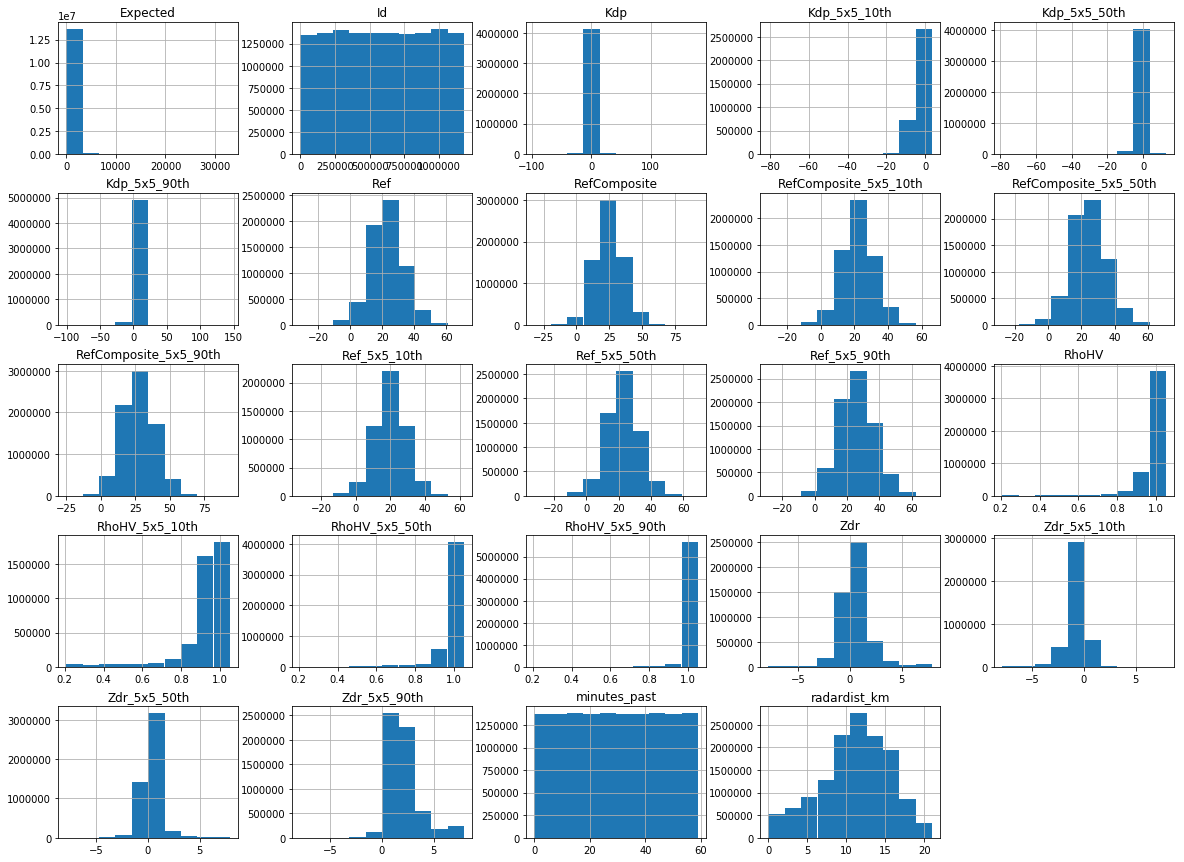

In [23]:
data_train.hist(figsize=(20, 15))
plt.show()

In [28]:
data_train.head(10)

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253906
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253906
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253906
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253906
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253906
5,1,55,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253906
6,2,1,2.0,9.0,5.0,7.5,10.5,15.0,10.5,16.5,...,0.998535,0.3750,-0.1250,0.3125,0.8750,1.059570,-1.410156,-0.350098,1.059570,1.015625
7,2,6,2.0,26.5,22.5,25.5,31.5,26.5,26.5,28.5,...,1.004883,0.0625,-0.1875,0.2500,0.6875,NaN,NaN,NaN,1.410156,1.015625
8,2,11,2.0,21.5,15.5,20.5,25.0,26.5,23.5,25.0,...,1.001953,0.3125,-0.0625,0.3125,0.6250,0.350098,NaN,-0.350098,1.759766,1.015625
9,2,16,2.0,18.0,14.0,17.5,21.0,20.5,18.0,20.5,...,1.001953,0.2500,0.1250,0.3750,0.6875,0.350098,-1.059570,0.000000,1.059570,1.015625


In [41]:
data_train.tail(10)

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
13765191,1180945,14,9.0,33.5,NaN,32.5,46.5,35.5,6.5,35.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.632812
13765192,1180945,19,9.0,43.5,9.5,39.0,49.5,43.5,15.5,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.632812
13765193,1180945,24,9.0,31.5,19.5,31.5,41.0,31.5,20.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.632812
13765194,1180945,28,9.0,24.0,25.5,31.0,41.0,24.0,25.5,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.632812
13765195,1180945,33,9.0,25.5,22.0,27.0,31.0,29.0,25.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.632812
13765196,1180945,38,9.0,33.0,19.5,25.5,36.5,33.0,20.5,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.632812
13765197,1180945,42,9.0,33.0,21.0,30.5,37.0,36.5,22.0,33.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.632812
13765198,1180945,47,9.0,29.5,10.0,26.0,30.5,31.0,16.5,26.0,...,1.051758,1.75,NaN,0.750,3.0000,13.382812,NaN,NaN,13.382812,8.632812
13765199,1180945,52,9.0,19.0,NaN,15.5,26.5,19.0,NaN,16.5,...,1.051758,NaN,NaN,NaN,2.8125,NaN,NaN,NaN,NaN,8.632812
13765200,1180945,57,9.0,7.5,NaN,10.0,13.0,14.5,10.0,12.5,...,1.051758,0.00,-1.125,0.375,3.2500,6.070312,NaN,-8.03125,6.070312,8.632812


In [40]:
data_train.groupby('Id')['minutes_past'].count().describe()

count    1.180945e+06
mean     1.165609e+01
std      3.254159e+00
min      1.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.400000e+01
max      1.900000e+01
Name: minutes_past, dtype: float64

#### minutes_past
* distribution
    * uniform
    * range [0-59] mins
    * mean = 29.52 mins

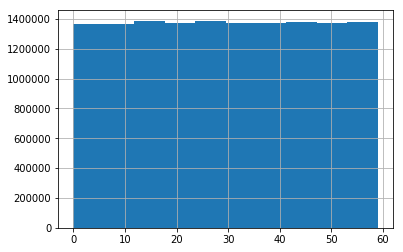

In [45]:
data_train.minutes_past.hist()

In [46]:
data_train.minutes_past.describe()

count    1.376520e+07
mean     2.952373e+01
std      1.730813e+01
min      0.000000e+00
25%      1.500000e+01
50%      3.000000e+01
75%      4.400000e+01
max      5.900000e+01
Name: minutes_past, dtype: float64

#### radardist_km
* distribution
    * shape: symmetric unimodal
    * mean ~ 11 km., sd ~ 4.18
    * median = 11
    * range (0, 21), IQR = 5

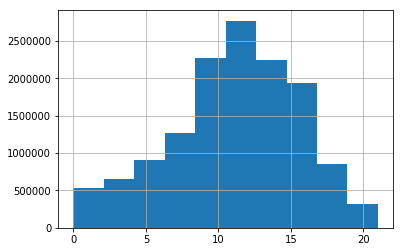

In [47]:
data_train.radardist_km.hist()

In [49]:
data_train.radardist_km.describe()

count    13765201.0
mean            NaN
std             0.0
min             0.0
25%             9.0
50%            11.0
75%            14.0
max            21.0
Name: radardist_km, dtype: float64

#### Ref 
* destribution: (ref, 10th, 50th, 90th)
    * shape: symmetric unimodal
    * center: median (22.5, 20.0, 22.5, 25.5)
    * spread: range(-31, 71), IQR = 29.5 - 16 = 13.5
    * few outliers

In [63]:
data_train.iloc[:, 3:7].describe()

,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th
count,6349375.0,5283988.0,6356482.0,7551281.0
mean,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,0.0
min,-31.0,-32.0,-32.0,-28.5
25%,16.0,14.0,16.0,18.0
50%,22.5,20.0,22.5,25.5
75%,29.5,26.0,29.0,33.5
max,71.0,62.5,69.0,72.5


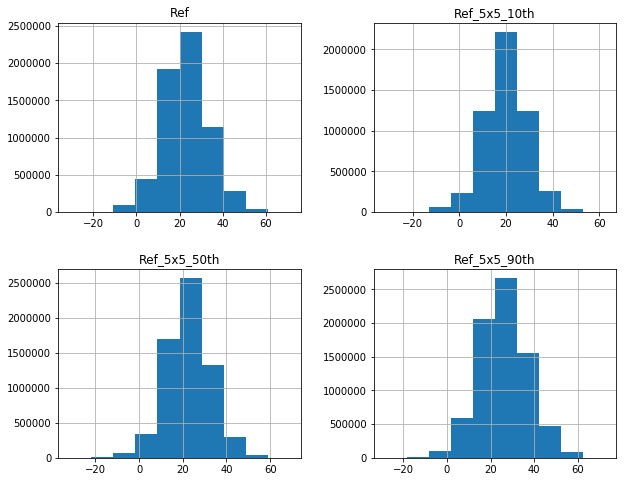

In [62]:
data_train.iloc[:, 3:7].hist(figsize=(10, 8))
plt.show()

#### RefComposite
* distribution
    * shape: symmetric unimodal
    * center: median = 24.0
    * spread: Range(-32.0, 92.5), IQR = 31.5 - 17.5 = 14
    * few outliers

In [66]:
data_train.iloc[:, 7:11].describe()

,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th
count,6716343.0,5755673.0,6711663.0,7829203.0
mean,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,0.0
min,-32.0,-31.0,-27.5,-25.0
25%,17.5,16.0,17.5,19.5
50%,24.0,22.0,24.0,27.0
75%,31.5,28.5,31.5,35.0
max,92.5,66.0,71.0,93.5


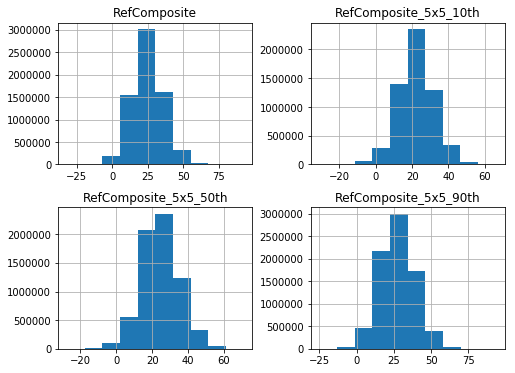

In [67]:
data_train.iloc[:, 7:11].hist(figsize=(8, 6))
plt.show()

#### RhoHV
* distribution
    * shape: markedly left skew 
    * center: median = .992
    * spread: range(.208, 1.05), IQR = 1.00 - 9.72 = .28
    * outlier: few extremely low values (lower cutoff < 9.3)

In [69]:
data_train.iloc[:, 11:15].describe()

,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th
count,4.934916e+06,4.133154e+06,4.936568e+06,5.905584e+06
mean,NaN,NaN,NaN,NaN
std,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
min,2.083740e-01,2.083740e-01,2.083740e-01,2.083740e-01
25%,9.716797e-01,9.150391e-01,9.750977e-01,9.985352e-01
50%,9.916992e-01,9.584961e-01,9.916992e-01,1.011719e+00
75%,1.001953e+00,9.814453e-01,9.985352e-01,1.051758e+00
max,1.051758e+00,1.051758e+00,1.051758e+00,1.051758e+00


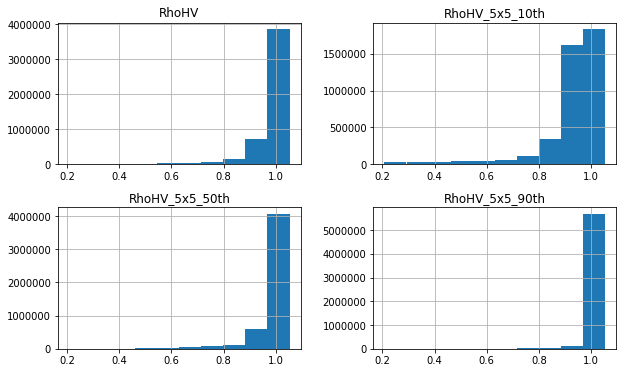

In [70]:
data_train.iloc[:, 11:15].hist(figsize=(10, 6))
plt.show()

#### Zdr
* distribution
    * shape: roughly symmetric unimodal
    * center: median = 0.375
    * spread: range(-7.87, 7.93), IQR = 1.06 - (-1.88) = 2.94
    * outlier: few outside [-6.29, 5.47] range

In [74]:
data_train.iloc[:, 15:19].describe()

,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th
count,4.934916e+06,4.133154e+06,4.936568e+06,5.905584e+06
mean,NaN,NaN,NaN,NaN
std,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
min,-7.875000e+00,-7.875000e+00,-7.875000e+00,-7.875000e+00
25%,-1.875000e-01,-1.125000e+00,-6.250000e-02,1.062500e+00
50%,3.750000e-01,-6.250000e-01,2.500000e-01,1.687500e+00
75%,1.062500e+00,-1.875000e-01,6.875000e-01,2.625000e+00
max,7.937500e+00,7.937500e+00,7.937500e+00,7.937500e+00


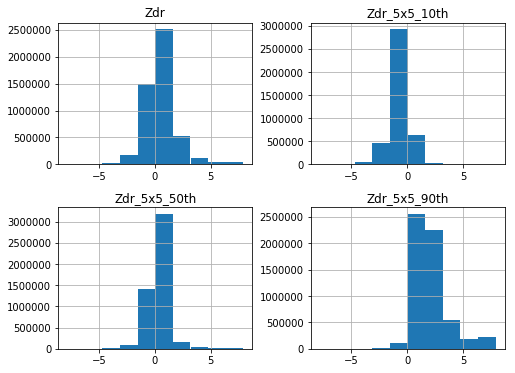

In [75]:
data_train.iloc[:, 15:19].hist(figsize=(8, 6))
plt.show()

#### Kdp
* distribution
    * shape: symmetric unimodal
    * center: median=0
    * spread: range(-96, 179), IQR = 1.75 - (-1.41) = 3.16
    * outliers: some with extremely high or low values, cutoff range(-6, 6)

In [80]:
data_train.iloc[:, 19:23].describe()

,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
count,4.182635e+06,3.428782e+06,4.187281e+06,5.052776e+06
mean,NaN,NaN,NaN,NaN
std,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
min,-9.606250e+01,-8.081250e+01,-7.875000e+01,-1.001875e+02
25%,-1.410156e+00,-4.578125e+00,-7.099609e-01,2.070312e+00
50%,0.000000e+00,-2.820312e+00,0.000000e+00,3.519531e+00
75%,1.750000e+00,-1.759766e+00,3.500977e-01,5.640625e+00
max,1.797500e+02,3.519531e+00,1.279688e+01,1.446250e+02


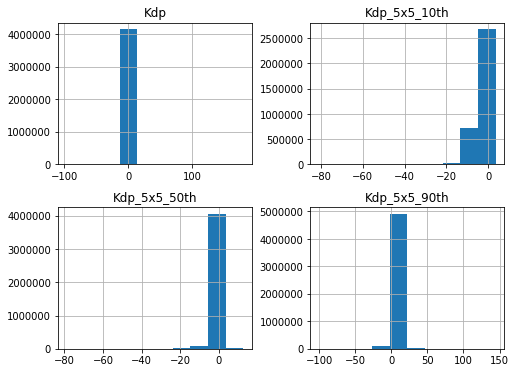

In [81]:
data_train.iloc[:, 19:23].hist(figsize=(8, 6))
plt.show()

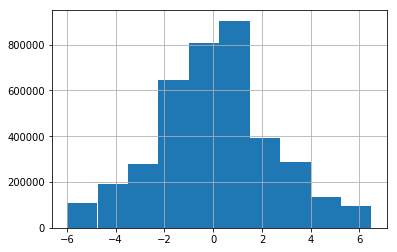

In [83]:
# after remove outliers
data_train.Kdp[np.logical_and(-6. < data_train.Kdp, data_train.Kdp < 6.5)].hist()

In [43]:
data_train.columns

Index(['Id', 'minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected'],
      dtype='object')

#### Expected
* distribution
    * shape: strongly right skew
    * center: median = 1.015
    * spread: range(.01, 33024), IQR = 3.81 - .25 = 3.56
    * outliers: many extreme values

In [84]:
data_train.Expected.describe()

count    1.376520e+07
mean              NaN
std               NaN
min      1.000214e-02
25%      2.539062e-01
50%      1.015625e+00
75%      3.810547e+00
max      3.302400e+04
Name: Expected, dtype: float64

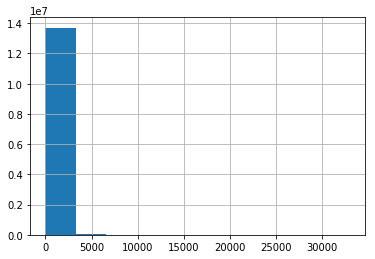

In [85]:
data_train.Expected.hist()

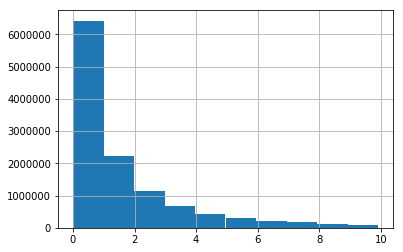

In [86]:
# excluding outliers
data_train.Expected[data_train.Expected < 10].hist()

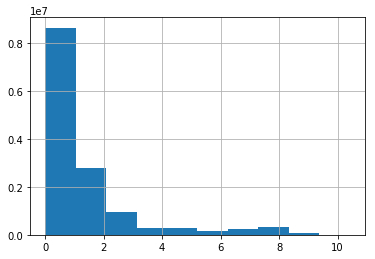

In [89]:
np.log1p(data_train.Expected).hist()

In [90]:
np.isfinite?

In [91]:
5/8

0.625

In [93]:
by_id_avg = data_train.groupby('Id').mean()

In [94]:
by_id_avg.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253906
2,29.083333,2.0,16.62500,13.664062,17.375000,21.328125,22.671875,20.37500,22.921875,25.921875,...,1.000000,0.380127,0.119812,0.416748,0.781250,-0.288086,-1.448242,-0.319092,1.116211,1.015625
3,30.750000,10.0,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,8.500000,...,0.801758,NaN,NaN,NaN,2.062500,NaN,NaN,NaN,NaN,26.156250
4,28.153846,9.0,26.59375,20.078125,25.796875,30.265625,26.671875,21.09375,25.109375,32.218750,...,1.015625,-1.125000,NaN,0.500000,1.515625,7.031250,NaN,0.000000,6.328125,4.062500
5,28.714286,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.500000


In [107]:
def plot_two_varibles(x_col, y_col):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
    ax[0].plot(by_id_avg[x_col], by_id_avg[y_col], '.', alpha=.1)
    ax[0].set_xlabel(x_col)
    ax[0].set_ylabel(y_col)
    ax[1].plot(by_id_avg[x_col], by_id_avg[y_col], '.', alpha=.1)
    ax[1].semilogy()
    fig.tight_layout()
    fig.suptitle("{} vs. {}".format(x_col, y_col))

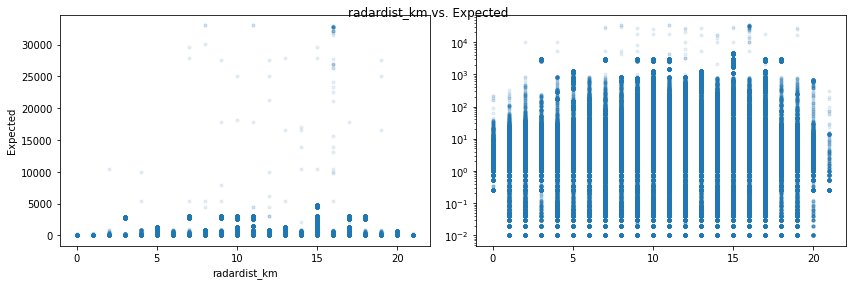

In [106]:
plot_two_varibles('radardist_km', 'Expected')

In [110]:
cols = by_id_avg.columns[1:-1]
cols

Index(['radardist_km', 'Ref', 'Ref_5x5_10th', 'Ref_5x5_50th', 'Ref_5x5_90th',
       'RefComposite', 'RefComposite_5x5_10th', 'RefComposite_5x5_50th',
       'RefComposite_5x5_90th', 'RhoHV', 'RhoHV_5x5_10th', 'RhoHV_5x5_50th',
       'RhoHV_5x5_90th', 'Zdr', 'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th',
       'Kdp', 'Kdp_5x5_10th', 'Kdp_5x5_50th', 'Kdp_5x5_90th'],
      dtype='object')

In [109]:
col2 = 'Expected'

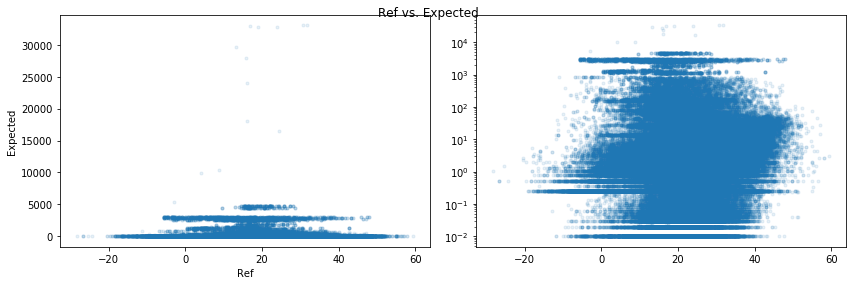

In [111]:
plot_two_varibles(cols[1], col2)

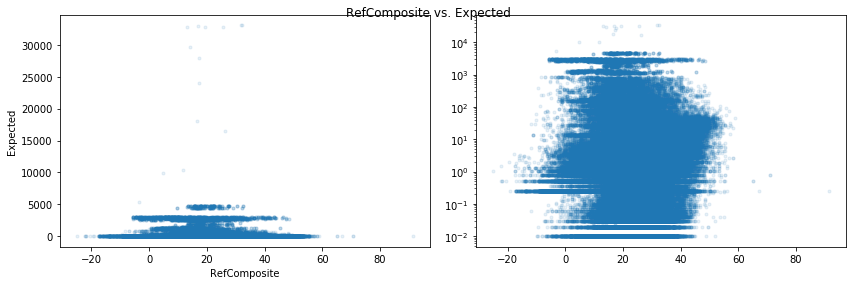

In [113]:
# 5, 9, 13, 17
plot_two_varibles(cols[5], col2)

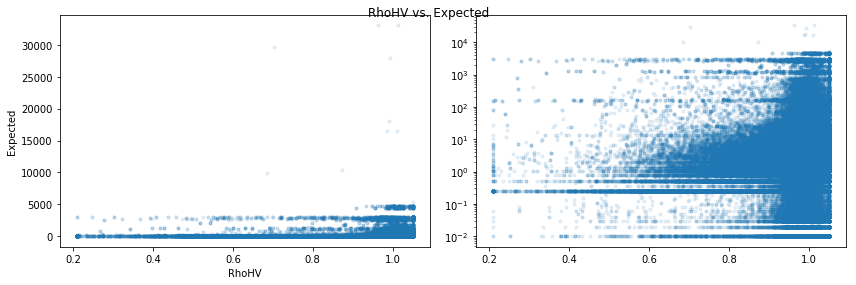

In [114]:
plot_two_varibles(cols[9], col2)

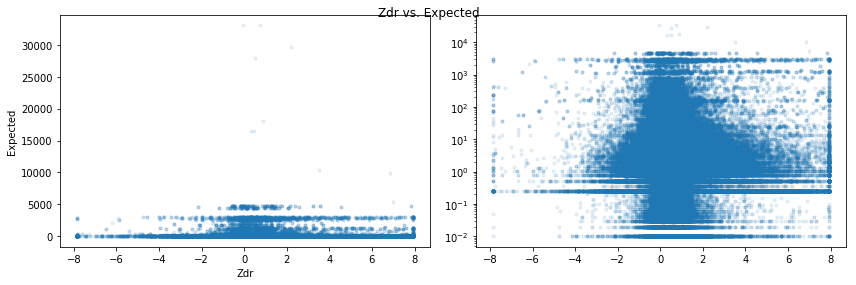

In [115]:
plot_two_varibles(cols[13], col2)

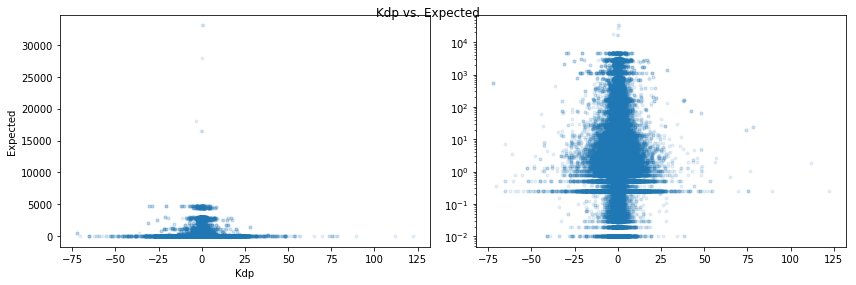

In [116]:
plot_two_varibles(cols[17], col2)

In [121]:
del data_train, by_id_avg

In [157]:
l.strip().split(',')

['Id',
 'minutes_past',
 'radardist_km',
 'Ref',
 'Ref_5x5_10th',
 'Ref_5x5_50th',
 'Ref_5x5_90th',
 'RefComposite',
 'RefComposite_5x5_10th',
 'RefComposite_5x5_50th',
 'RefComposite_5x5_90th',
 'RhoHV',
 'RhoHV_5x5_10th',
 'RhoHV_5x5_50th',
 'RhoHV_5x5_90th',
 'Zdr',
 'Zdr_5x5_10th',
 'Zdr_5x5_50th',
 'Zdr_5x5_90th',
 'Kdp',
 'Kdp_5x5_10th',
 'Kdp_5x5_50th',
 'Kdp_5x5_90th',
 'Expected']

In [158]:
tr_file = 'datasets/how_much_rain/train.csv'

n = 500000 
max_steps = 30
dims = 24

with open(tr_file, 'r') as f:
    
    # skip column names
    f.readline()

    X_data = np.zeros(shape=(n, max_steps, dims), dtype=np.float32)
    y_data = np.zeros(shape=(n, 1), dtype=np.float32)
    
    sample_count = 0
    # read data line by line
    src = f.readline().strip()
    cols = src.split(',')
    while (sample_count < n) and (src!=''):
        
        current_id = cols[0]
        rainfall = float(cols[-1])
        data_seq = []
        all_null = True
        while cols[0] == current_id:
            data_seq.append(src)
            if cols[3].strip() != '':
                all_null = False
            src = f.readline().strip()
            cols = src.split(',')
        if all_null:
            # drop data
            continue
        current_inputs = np.zeros(shape=(max_steps, dims), dtype=np.float32)
        for i, seq in enumerate(data_seq):
            values = seq.split(',')[1:-1]
            assert len(values) == 22
            values = [float(v) if v!='' else 0. for v in values]
            values.append(len(data_seq))
            values.append(np.mean(values[:-1]))
            values = np.array(values)
            #print(values)
            values[2:10] = np.power(np.power(10, values[2:10]/10.) / 200., .625)
            values[14:18] = np.power(10, values[14:18]/10.)
            current_inputs[i, :] = values
        
        X_data[sample_count, :, :] = current_inputs
        y_data[sample_count] = rainfall
        sample_count += 1
        
X_data, y_data = X_data[:sample_count], y_data[:sample_count]

In [159]:
X.shape, y.shape

(TensorShape([Dimension(None), Dimension(30), Dimension(24)]),
 TensorShape([Dimension(None), Dimension(1)]))

In [166]:
reset_graph()


n_sample = 100000
n_steps = 30
n_inputs = 24
n_neurons = 35
n_outputs = 1


X = tf.placeholder(shape=(None, n_steps, n_inputs), dtype=tf.float32)
y = tf.placeholder(shape=(None, 1), dtype=tf.float32)

cell = tf.contrib.rnn.LSTMCell(n_neurons, cell_clip=-1., activation=tf.tanh)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

h_state = states[1]
y_pred = tf.layers.dense(h_state, n_outputs, activation=None)

loss = tf.reduce_mean(tf.losses.absolute_difference(labels=y, predictions=y_pred))

optimizer = tf.train.AdamOptimizer(learning_rate=.005)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [161]:
def feed_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    for idx in np.array_split(rnd_idx, batch_size):
        yield X[idx], y[idx]
        
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=10000)

In [163]:
X_train.shape, X_test.shape

((490000, 30, 24), (10000, 30, 24))

In [168]:
n_epoch = 100
batch_size = 128

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epoch):
        for X_batch, y_batch in feed_batch(X_train, y_train, batch_size):
            sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
        val_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        print("Epoch {:3d}, val-loss: {:.4f}".format(epoch, val_loss))
    saver.save(sess, './my_rain_model')

Epoch   0, val-loss: 23.7052
Epoch   1, val-loss: 23.7053
Epoch   2, val-loss: 23.7052
Epoch   3, val-loss: 23.7052
Epoch   4, val-loss: 23.7052
Epoch   5, val-loss: 23.7052
Epoch   6, val-loss: 23.7052
Epoch   7, val-loss: 23.7053
Epoch   8, val-loss: 23.7053
Epoch   9, val-loss: 23.7052
Epoch  10, val-loss: 23.7052
Epoch  11, val-loss: 23.7053
Epoch  12, val-loss: 23.7053
Epoch  13, val-loss: 23.7052
Epoch  14, val-loss: 23.7053
Epoch  15, val-loss: 23.7052
Epoch  16, val-loss: 23.7055
Epoch  17, val-loss: 23.7053
Epoch  18, val-loss: 23.7053
Epoch  19, val-loss: 23.7052
Epoch  20, val-loss: 23.7053
Epoch  21, val-loss: 23.7052
Epoch  22, val-loss: 23.7055
Epoch  23, val-loss: 23.7052
Epoch  24, val-loss: 23.7052
Epoch  25, val-loss: 23.7052
Epoch  26, val-loss: 23.7055
Epoch  27, val-loss: 23.7052
Epoch  28, val-loss: 23.7052
Epoch  29, val-loss: 23.7053
Epoch  30, val-loss: 23.7052
Epoch  31, val-loss: 23.7052
Epoch  32, val-loss: 23.7052
Epoch  33, val-loss: 23.7052
Epoch  34, val

In [170]:
with tf.Session() as sess:
    saver.restore(sess, './my_rain_model')
    y_test_pred = sess.run(y_pred, feed_dict={X:X_test})

INFO:tensorflow:Restoring parameters from ./my_rain_model


[]

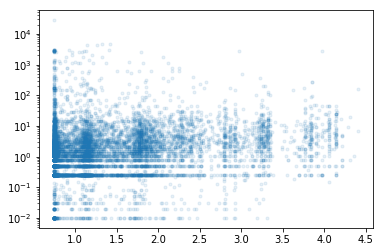

In [174]:
plt.plot(y_test_pred.flat, y_test.flat,'.', alpha=.1)
plt.semilogy()

In [177]:
pd.DataFrame(np.hstack((y_test_pred, y_test)), columns=['pred', 'true']).describe()

,pred,true
count,10000.000000,10000.000000
mean,1.349372,24.180029
std,0.794786,341.307312
min,0.744392,0.010000
25%,0.750786,0.350000
50%,1.057606,1.270001
75%,1.748804,3.556002
max,4.411254,27877.281250


In [179]:
np.in1d?